## **Final Project Submission**

Please fill out:
* **Student name:** John Mbego, Joseline Odhiambo, Norah Oluoch, Prisca Kimanzi, Sylvia Manono
* **Student pace:** Part time
* **Scheduled project review date/time:** Monday, 22/07/2024
* **Instructor name:** Samuel G. Mwangi
* **Blog post URL:** https://github.com/Jodhiamboapiyo/Group15_project.git


## **Introduction** 

##### `Increasing Property Value Through Strategic Renovations` 

In the realm of real estate, the decision to renovate a home can be pivotal, influencing its market appeal, sale price, and ultimately, its overall value. For homeowners looking to optimize their property's potential before listing it for sale, understanding which renovations provide the greatest return on investment is essential.

This project focuses on developing a predictive model that evaluates the potential impact of various renovation projects on property values. By incorporating features such as bedrooms, bathrooms, sqft_living, waterfront, condition, and grade as features for renovations.

## **Objectives**


#### 1. To perform data exploration and cleaning

- Conduct an initial exploration of the dataset to understand its structure and contents.
- Identify and handle missing or inconsistent data to ensure a clean dataset for analysis.


#### 2. To perform exploratory data analysis (EDA) to identify trends, correlations, and patterns in the data

- Use statistical tests to validate the significance of relationships between features and house prices.

#### 3. To determine which features are most relevant to house pricing

- Check the relationship between waterfront front and house prices, and justify if it can be a feature for the linear regression model. 
- Compare the relation between building features and prices, i.e. how the square footage of the home, number of bedrooms and bathrooms affect house prices, the impact on the house value, and to certify what number best fits for better values and good prices.  
- Verifying that the impact of adding bathrooms increases the property's value.
- Feature selection and engineering from correlations.

#### 4. To perform model building and evaluation 

- Develop regression models to predict house prices based on the selected features.
- Evaluate the models using appropriate metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


#### 5. To provide insights and recommendations

- Interpret the results of the models to understand how different features impact house prices.
- Provide actionable recommendations for homeowners and real estate professionals on which features to focus on during renovations to maximize property value.
- Business Impact: To assess the potential financial impact of changes in house features on overall pricing. This will help to offer strategic advice to real estate companies on investment and renovation decisions to enhance market competitiveness.

By achieving these objectives, the project aims to contribute valuable insights into the real estate market, helping stakeholders make informed decisions that can lead to better financial outcomes and optimized property investments.

## **Business Problem Statement**

The real estate agency needs a solution to provide reliable advice to homeowners regarding home renovations that can effectively increase the estimated market value of their properties. Homeowners seek clarity on which renovations yield the highest return on investment and by what amount, enabling them to make informed decisions about improving their homes before listing them for sale.

## **Data Exploration**

In [4]:
#Importing the relevant libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **The Data**

In [5]:
# Display the first few rows of the dataframe to understand its structure
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# drop by domain knowledge 
# Drop columns by index position
columns_to_drop = [1,9,10,12,13,15,16,17,18,19,20]  
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,8,1987


#### **Column names and descriptions: domain knowledge selected columns**
* **id** - unique identified for a house
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **grade** - overall grade given to the housing unit, based on King County grading system
* **yr_built** - Built Year


## **Exploratory Data Analysis (EDA)**

#### **Data Preparation and Cleaning** 

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,2015.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [9]:
# Check for missing values in the dataset
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
grade             0
yr_built          0
dtype: int64

In [10]:
corr = df['waterfront'].corr(df['price'])
print(f"Correlation between price and waterfront: {corr}")

Correlation between price and waterfront: 0.27629538393525727


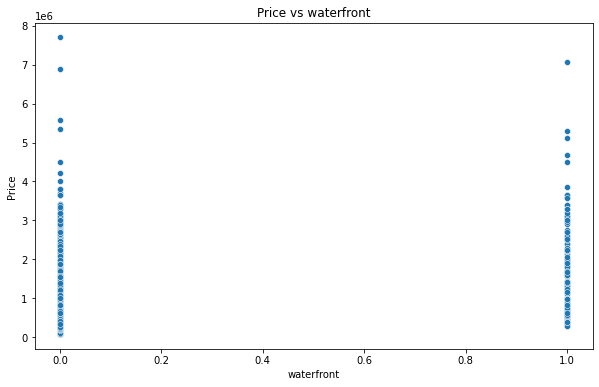

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='waterfront', y='price')
plt.title('Price vs waterfront')
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.show()

##### *Result*

Objective met and it is clear that in as much as `waterfront` is a key feature to building it's presented data set cannot be used in our model due to several null values. 
Linked by specific house `ID` we cannot fillna beacuse it also depends on geographic house location i.e by domain knowledge 

In [12]:
columns_to_drop = ['waterfront']  
df.drop(columns=columns_to_drop, inplace=True)
df.head(3)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,6,1933


In [13]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
grade          0
yr_built       0
dtype: int64

#### **Outliers**

Removing outliers before computing correlations yields correlation coefficients that better represent the central tendency of your data, especially if outliers are not representative of the underlying relationship between variables.

But this `code phrase is commented` and its not neccessary beacuse the data has related relationship between it's variables, you can try check the model validation with the outlier code and without. 

In [14]:
# # Calculate IQR for selected columns
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find outliers
# outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# # Print indices of outliers
# outlier_indices = df.index[outliers]
# df = df.drop(outlier_indices)

## **Data Visualizations** 

#### **a. Pair plot of variables against each other** 

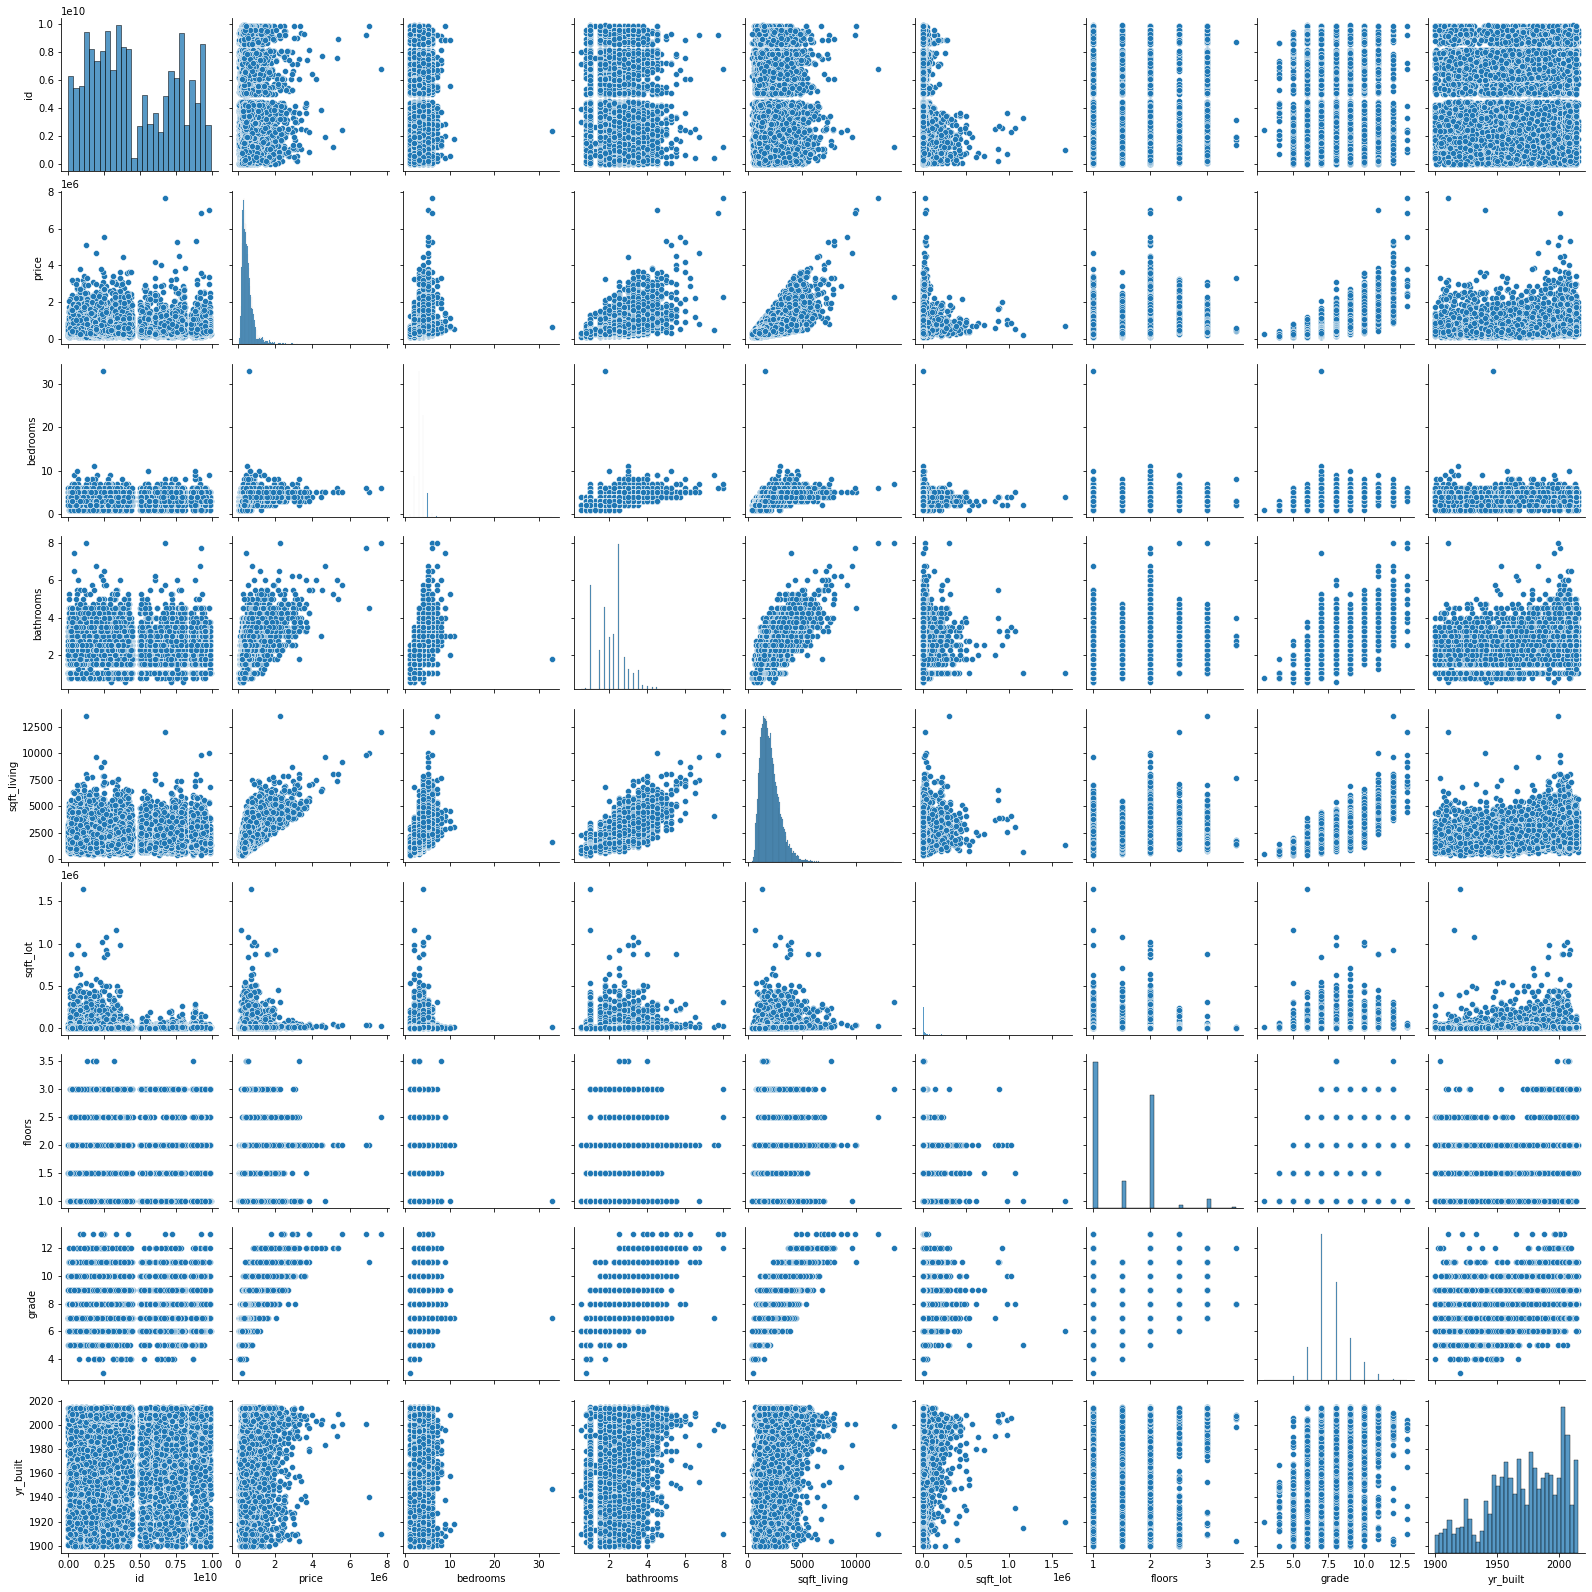

In [ ]:

sns.pairplot(data=df)

#### **b. Correlation heat map**

Since the data has been cleaned and various columns dropped , the remaining data are essential to our model. a statistical approach is therefore needed to help pick whats best for the model. 

*The correlation heat map below depicts what features we use , and it bases on the coefficents with price*

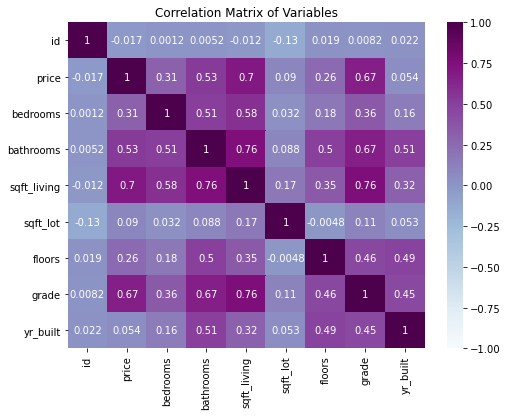

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()


**Features available for consideration**
> sqft_living with a correlation coefficient of 0.7

> Grade with a correlation coefficient of 0.67

> Bathrooms with a correlation coefficient of 0.53

> Bedrooms with a correlation coefficient of 0.31

#### **c. Scatter plot for footage of the home vs price (reffer columns description)**

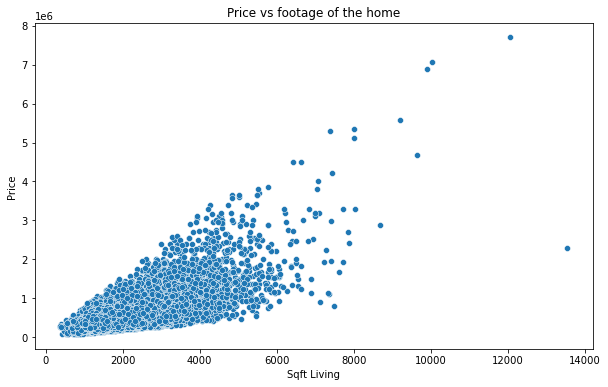

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Price vs footage of the home')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

Increased house size footage is quite commendable as the bigger it comes the better the prices, and with a coefficient of 0.7 it best relates to price. In renovation , good  sqt_living helps in appraisal value, better negotiation position, enhanced marketing.

#### **d. Box plot for grade vs price** 

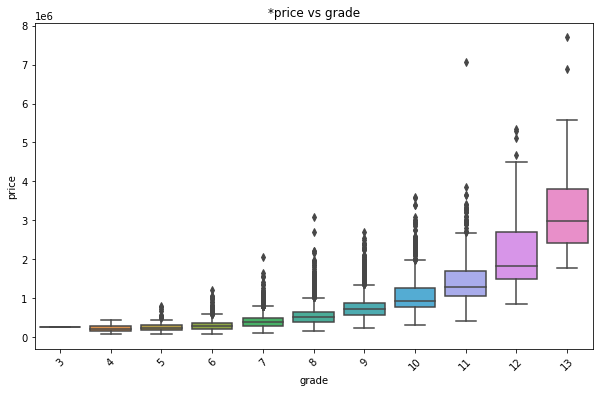

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df ,x='grade' , y='price')
plt.title('*price vs grade')
plt.xlabel('grade')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

The above box plot shows the impact of `grade` on prices and is statistically justifiable that the better the grade the higher the house price though a majority of purchases lies between range 5 : 7 with low significant increase. 
Therefore higher grades is advisable but for higher number purchases houses with given range is okay.
`grade` is also an important feature for consideration in our regression model due to its high correlation coefficent (0.67).

#### **e. Box plot for bathroom vs price**

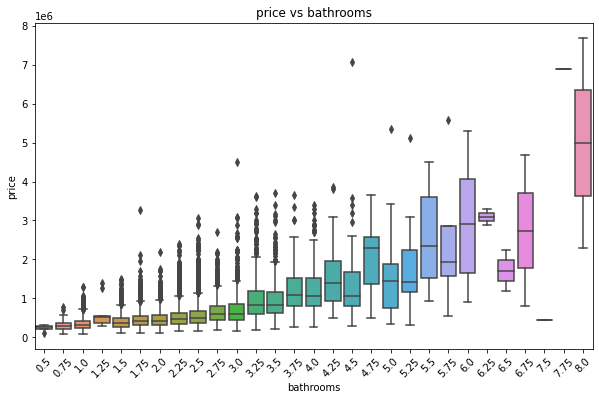

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df ,x='bathrooms' , y='price')
plt.title('price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

The box plot for `price` versus bathrooms with a correlation of `0.53` shows generally increasing trend in price with an increase in the number of bathrooms, with some variability yes and potential outliers.

A correlation coefficient of 0.53 indicates a moderate positive relationship between price and the number of `bathrooms`. This means as the number of bathrooms increases, generally, so does the price of the house, but not perfectly.

Evaluate Investment Opportunities: For a real estate investor agency , properties with fewer bathrooms relative to their price will present opportunities for improvement or renovation. Adding bathrooms could potentially increase the property's value.

The range 1.5 : 1.75 is equally okay since they are pricable and has less price significant increase. 

#### **f. Box plot for bedroom vs price**

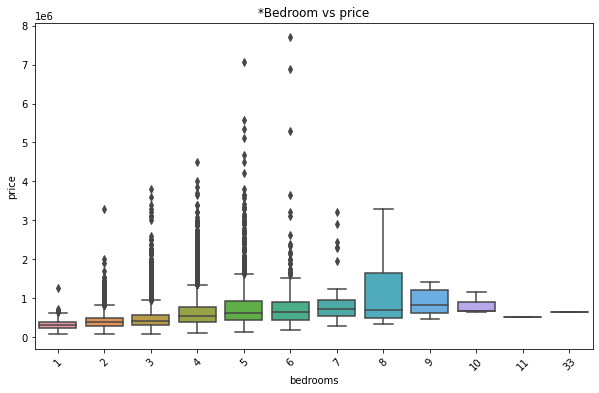

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df ,x='bedrooms' , y='price')
plt.title('*Bedroom vs price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()


### **Chart Analysis**

From the scatterplot and the box plot analysis, it clearly shows that features such as `Grade`, `Bathrooms`, `sqft living` and `bedrooms` highly correlate.

This means that the analysed features have a positive impact on the pricing of the house.

A good example is the 'Bedrooms' feature, we can see that the best number of bedrooms to have in a house either 4 or 5.
The higher the number of bedrooms does not equate to a higher price of the house.

This is however, different with the 'Grade' of the house. The higher the grade, indicates a higher pricing of the house.

### **Feature Selection** 

In [21]:
df = df[['sqft_living','grade','bathrooms','bedrooms','price']]


## **Modelling and Evaluation**

### **Model Data Preparation** 

##### 1. Features assigning , the `predictors` 

In [22]:
X = df[['sqft_living','grade','bathrooms','bedrooms']]

##### 2.  `predicted` assigning `price`

In [23]:
Y = df[['price']]

##### 3. Data train test split

Test data using inbuilt py libraries

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

##### 4. Standard scaling 

From model assumptions , data is supposed to be without `null values` or `oultliers` and also scaled with
a `normal distribution` the below code perfoms `data scaling` since all of the assumptions have already been met.

In [25]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()
x_train_scaled = data_scaler.fit_transform(x_train)
x_test_scaled = data_scaler.transform(x_test)

### **Models**

#### **Model 1**

> **Model 1 with all predictors**

In [26]:
from sklearn.linear_model import LinearRegression

model_ONE =LinearRegression()
model_ONE.fit(x_train_scaled,y_train)


LinearRegression()

> **Model 1 validation**

In [27]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

y_pred = model_ONE.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)
print("mean difference of ", y_pred.mean()-Y.mean())

mse 60591750008.89342
mae 160590.0493596153
R2 0.5346837587732898
mean difference of  price   -2104.589244
dtype: float64


based on r2 score `model_ONE` scores  53.47%

- `model_ONE`, with ALL features `sqft_living,grade,bathrooms,bedrooms`, achieves an R-squared score of `0.5346` on the test set. This indicates that `53.47%` of the variance in  `prices` can be explained by these predictors.

***for the below models Kindly follow the above `model_ONE` procedures incase you need a step by step flow***

### **Model 2**

> **Model 2 without bedroom feature**

In [28]:
X = df[['sqft_living','grade','bathrooms']]
Y = df[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
data_scaler = StandardScaler()
x_train_scaled = data_scaler.fit_transform(x_train)
x_test_scaled = data_scaler.transform(x_test)
model_TWO =LinearRegression()
model_TWO.fit(x_train_scaled,y_train)
y_pred = model_TWO.predict(x_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)
print("mean difference of", y_pred.mean()-Y.mean())



mse 61048667496.09866
mae 161628.34589899494
R2 0.5311748466249215
mean difference of price   -2124.968349
dtype: float64


based on r2 score `model_TWO` scores  53.12%

 - `model_TWO`, with features `sqft_living,grade,bathrooms`, achieves an R-squared score of `0.5312` on the test set. This indicates that `53.12%` of the variance in `prices` can be explained by these predictors.

### **Model 3**

> **Model 3 modelled with stats~model**

In [29]:
from statsmodels.formula.api import ols
# Fitted OLS model with the new column names
model_THREE = ols('price ~ sqft_living + bathrooms + bedrooms + grade',  data=df).fit()

# Print the summary of the model
model_THREE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:20:49   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- `model_3`

`Here is the summary of the Ordinary Least Squares (OLS) regression model fit used to predict house prices (price) based on several features (sqft_living, bathrooms, bedrooms, grade).`

 *Here’s an interpretation of the key parts of the output*:

- **R-squared and Adjusted R-squared**:

  **R-squared**: This statistic measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (sqft_living, bathrooms, bedrooms, grade)

  An R-squared of 0.544 indicates that approximately 54.4% of the variability in house prices can be explained by these predictors

  **Adjusted R-squared**: This adjusts the R-squared value for the number of predictors in the model. 

  It accounts for the model’s degrees of freedom and penalizes the addition of unnecessary variables. Here, both R-squared and Adjusted R-squared are the same, indicating that all variables included in the model contribute to explaining the variance in house prices.



- **F-statistic and Prob (F-statistic)**:

  **F-statistic**: This tests the overall significance of the regression model. 

  A higher F-statistic (6429 in your case) with a very low Prob (F-statistic) value (close to 0.00) suggests that the overall model is statistically significant.

  This means that at least one of the predictors (sqft_living, bathrooms, bedrooms, grade) has a non-zero effect on predicting house prices. 

- **Coefficients (coef)**:

  Each coefficient represents the estimated change in the dependent variable (price) for a one-unit change in the predictor variable, holding other predictors constant.

  For example, sqft_living has a coefficient of 226.9304, meaning that for every additional square foot in living space, the predicted house price increases by approximately $226.93.

## **Conclusion** 


In conclusion, leveraging regression modeling provides a robust solution for the real estate agency to offer reliable advice to homeowners on home renovations. By analyzing data on past sales and renovations, this approach can effectively identify which upgrades yield the highest return on investment. Armed with this knowledge, homeowners can make informed decisions to enhance their properties' market value before listing, ensuring their investments translate into tangible returns when it's time to sell.



## **Insights and Recommendations**

- `sqft_living`

The best feature to consider during renovations to increase the pricing of the houses is the "sqft_living". For every additional square foot in living space, the predicted house price increases by approximately $226.93.

It's an important aspect and has a high correlation with the following benefits; Accurate Assessment, Enhanced Marketing, Appraisal Value 

- `grade`

Investments that improve the grade of a house, such as high-quality materials, modern designs, and better construction standards, can yield a high return on investment.

For instance, upgrading a house from *a grade of 7 to a grade of 8* could increase its price by nearly $96,740, holding other factors constant.
This can be particularly important in markets where buyers are willing to pay a premium for higher quality and better design.

- `bathrooms`

For a real estate investor agency, properties with fewer bathrooms relative to their price will present opportunities for improvement or renovation. Adding bathrooms could potentially increase the property's value.

- `bedrooms`

A recommended number lies between 3 - 5 and after that there is a low increase in property value/prices. Most houses should be renovated and with consideration of the given range. 
